### EDA with Red Wine Data

Dataset Information:

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests


These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/red_wine.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [10]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.shape

(1599, 12)

In [15]:
##List down all the column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
#Find out the Duplicate Records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11,34,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17,102,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10,37,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12,87,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4,11,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12,20,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24,32,0.99402,3.54,0.60,11.3,5


In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [23]:
##New dataset shape after deleting duplicated values
df.shape

(1359, 12)

In [26]:
##Correlation
correlation_df = df.corr()

In [30]:
correlation_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153791,-0.113198,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010487,0.076479,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060885,0.035506,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187310,0.203048,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005627,0.047402,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153791,-0.010487,-0.060885,0.187310,0.005627,1.000000,0.668025,-0.021981,0.070288,0.051606,-0.069346,-0.050554
total sulfur dioxide,-0.113198,0.076479,0.035506,0.203048,0.047402,0.668025,1.000000,0.071256,-0.066507,0.042923,-0.205667,-0.185112
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021981,0.071256,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070288,-0.066507,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051606,0.042923,0.148506,-0.196648,1.000000,0.093595,0.251397


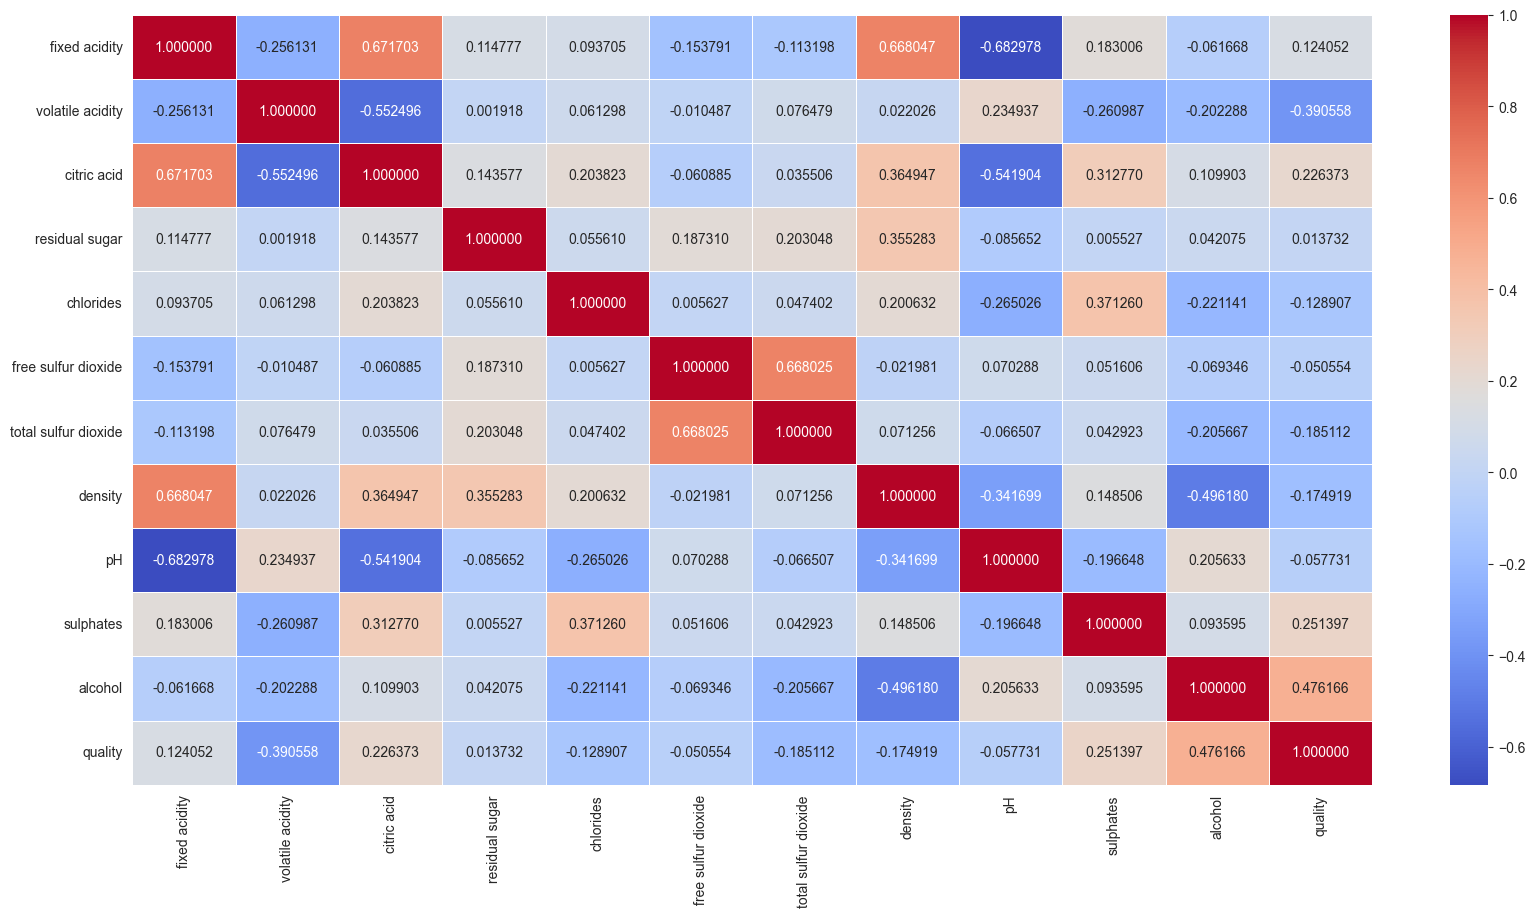

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm',fmt='2f',linewidths=0.5)
plt.show()


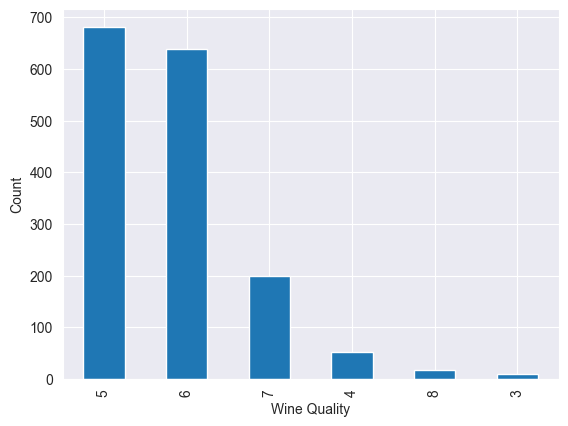

In [33]:
##Visualization
##conclusion - It is an imbalanced dataset
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


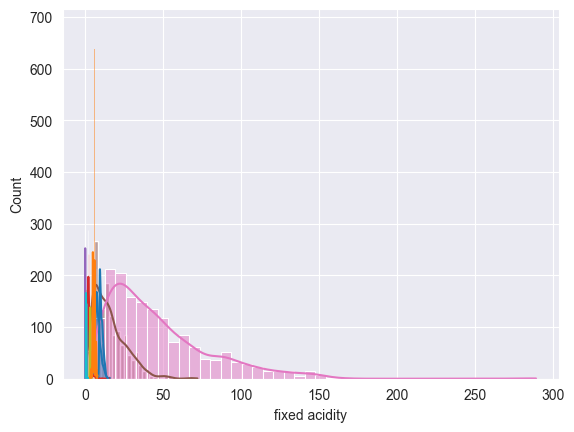

In [38]:
for column in df.columns:
    sns.histplot(df[column], kde=True)

<Axes: xlabel='alcohol', ylabel='Count'>

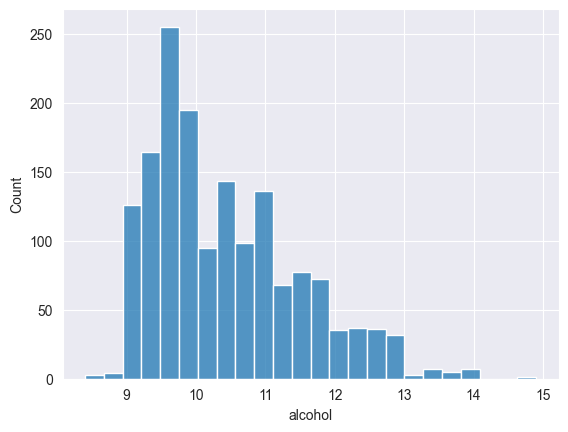

In [39]:
sns.histplot(df['alcohol'])

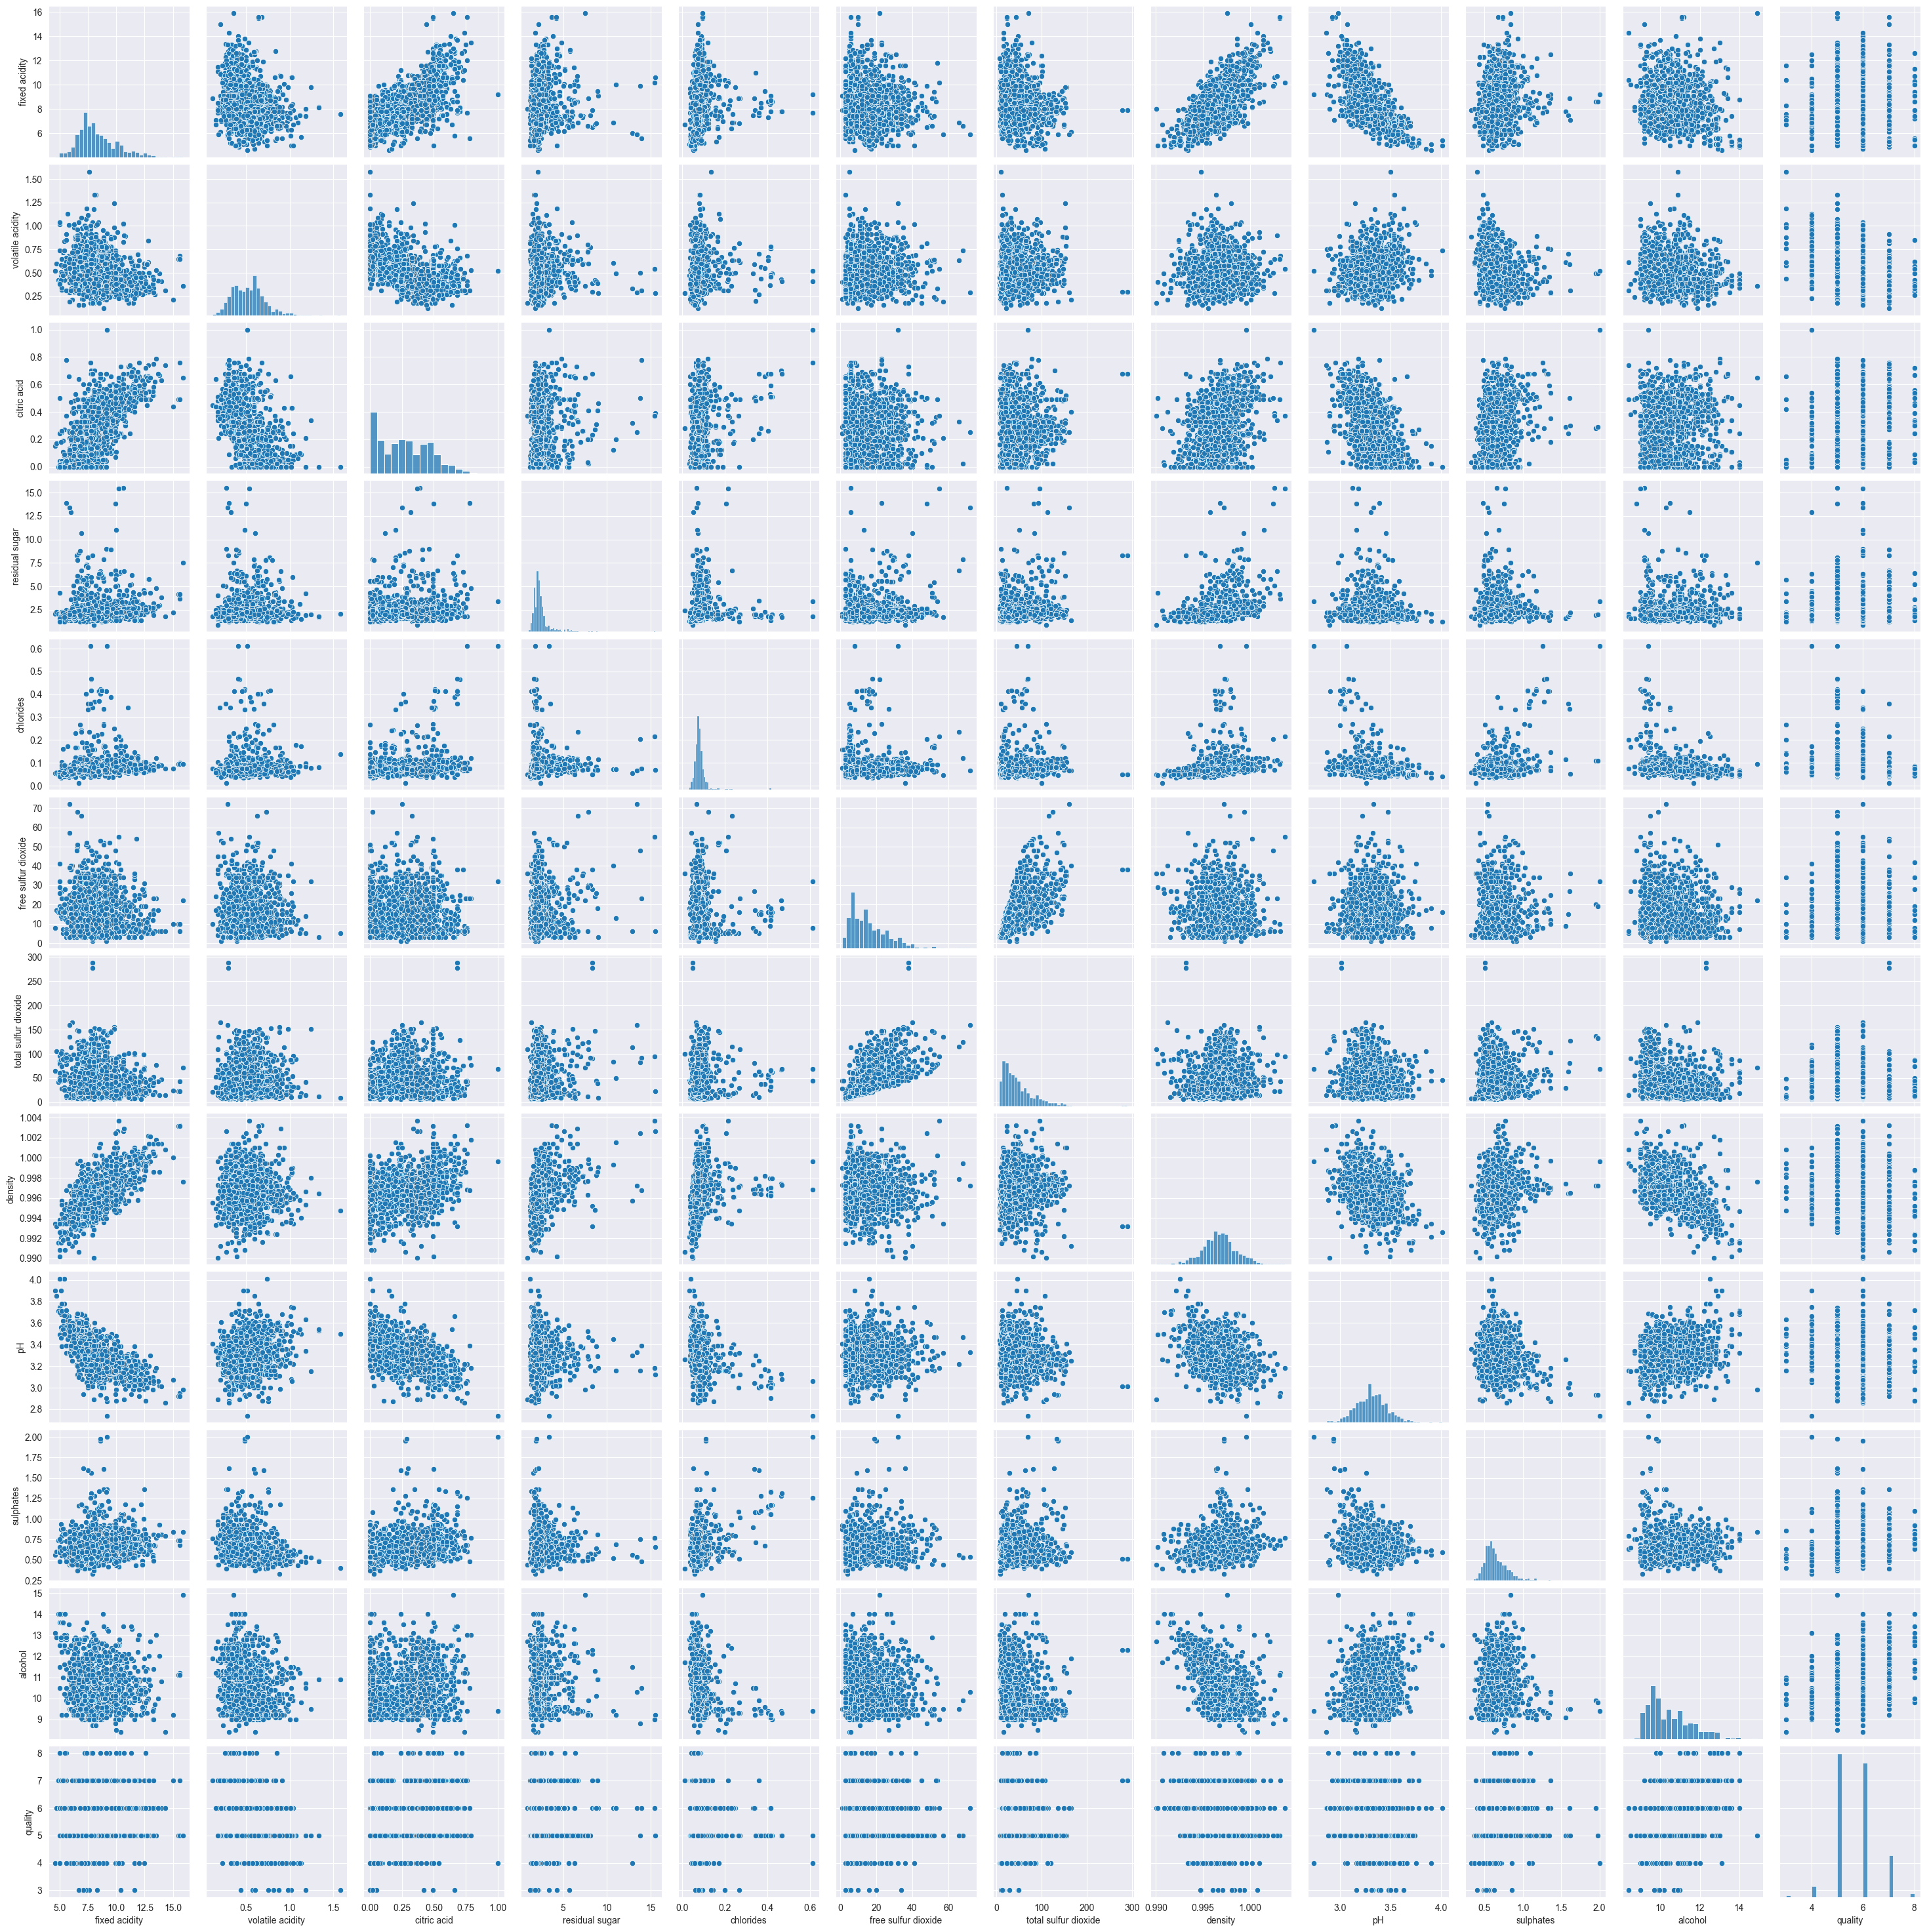

In [41]:
##univariate, bivariate, multivariate analysis
sns.pairplot(df)

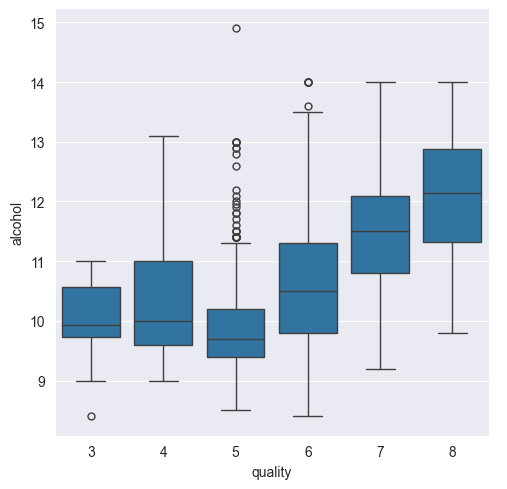

In [42]:
#categorical plot
sns.catplot(x='quality',y='alcohol', data=df, kind='box')

<Axes: xlabel='alcohol', ylabel='pH'>

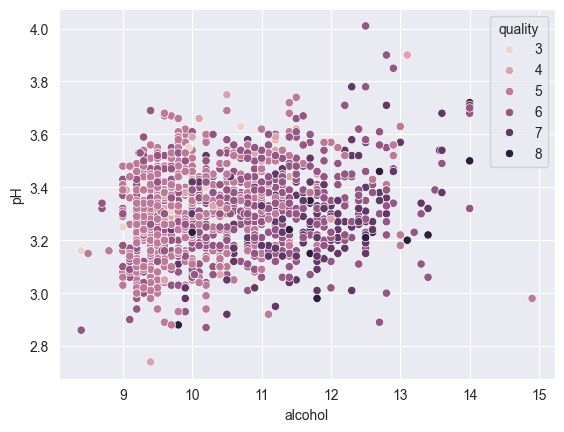

In [44]:
sns.scatterplot(x='alcohol',y='pH', hue='quality', data=df)